In [1]:
import pymc as pm
import arviz as az
az.style.use('seaborn')
import numpy as np

import warnings
warnings.filterwarnings('ignore')

/var/folders/kz/3m7b5b5n7n19qtpq86vft4ww0000gn/T/ipykernel_58903/2864835869.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  az.style.use('seaborn')


### Generate data

In [2]:
years = np.arange(1, 8)
default_rates = np.array([0.01, 0.015, 0.02, 0.045, 0.08, 0.035, 0.04])

### Specify model and *push inference button*

In [3]:
# Prior parameters
prior_alpha = 1
prior_beta = 1

In [4]:
with pm.Model() as default_model:
    # Prior for the default rate
    default_rate = pm.Beta('default_rate', alpha=prior_alpha, beta=prior_beta)
    
    # Likelihood of the observed data
    defaults = pm.Bernoulli('defaults', p=default_rate, observed=default_rates)
    
    # MCMC sampling
    trace = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [default_rate]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 17 seconds.


### Summarize posterior

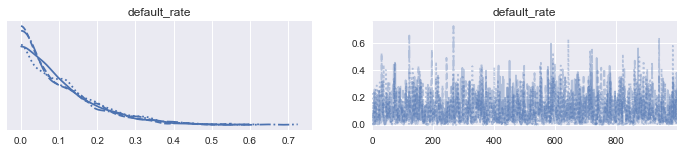

In [5]:
az.plot_trace(trace);

In [6]:
az.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
default_rate,0.109,0.097,0.0,0.29,0.003,0.002,1003.0,971.0,1.0


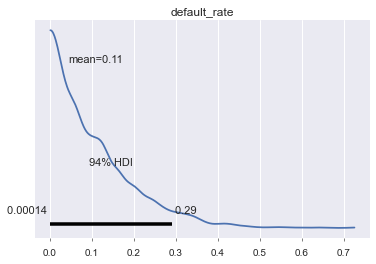

In [7]:
# Posterior analysis
az.plot_posterior(trace, var_names=['default_rate']);